# Drug Response Statistical Analysis

This notebook analyzes tumor size reduction in patients treated with two different drug regimens (Drug_A and Drug_B).  
Basic statistical methods and visualization are used to compare treatment effectiveness.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Dataset Creation

A simulated clinical dataset containing patient age, drug regimen, and tumor size measurements before and after treatment.


In [3]:
data = {
    "Patient_ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 50, 37, 62, 29, 41, 55, 60, 33, 48],
    "Drug_Regimen": ["Drug_A", "Drug_B", "Drug_A", "Drug_B", "Drug_A", "Drug_B", "Drug_A", "Drug_B", "Drug_A", "Drug_B"],
    "Tumor_Size_Before": [5.2, 6.1, 4.8, 7.0, 5.5, 6.3, 5.0, 6.8, 4.9, 6.0],
    "Tumor_Size_After": [3.1, 5.8, 3.9, 6.5, 4.2, 5.9, 3.8, 6.2, 3.7, 5.7]
}

df = pd.DataFrame(data)
df


,Patient_ID,Age,Drug_Regimen,Tumor_Size_Before,Tumor_Size_After
0,1,45,Drug_A,5.2,3.1
1,2,50,Drug_B,6.1,5.8
2,3,37,Drug_A,4.8,3.9
3,4,62,Drug_B,7.0,6.5
4,5,29,Drug_A,5.5,4.2
5,6,41,Drug_B,6.3,5.9
6,7,55,Drug_A,5.0,3.8
7,8,60,Drug_B,6.8,6.2
8,9,33,Drug_A,4.9,3.7
9,10,48,Drug_B,6.0,5.7


## Tumor Reduction Calculation


In [4]:
df["Tumor_Reduction"] = df["Tumor_Size_Before"] - df["Tumor_Size_After"]

df.groupby("Drug_Regimen")["Tumor_Reduction"].describe()


,count,mean,std,min,25%,50%,75%,max
Drug_Regimen,,,,,,,,
Drug_A,5.0,1.34,0.450555,0.9,1.2,1.2,1.3,2.1
Drug_B,5.0,0.42,0.130384,0.3,0.3,0.4,0.5,0.6


## Visualization of Tumor Reduction


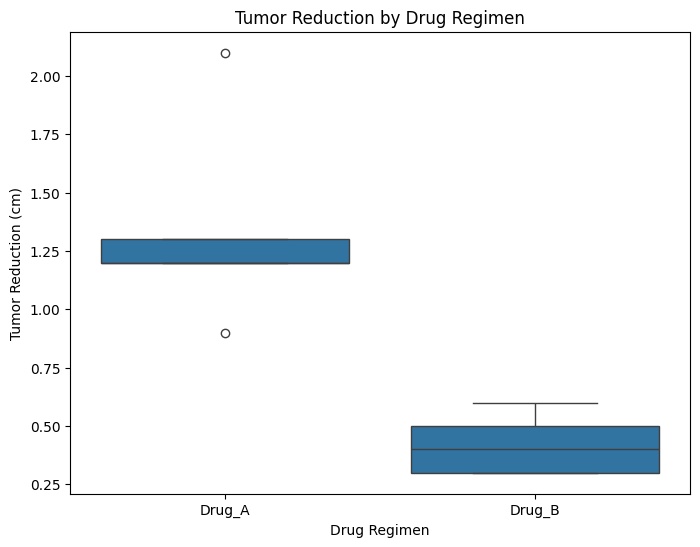

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Drug_Regimen", y="Tumor_Reduction", data=df)
plt.title("Tumor Reduction by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Reduction (cm)")
plt.show()


## Statistical Hypothesis Testing (Independent T-Test)


In [6]:
drug_a = df[df["Drug_Regimen"] == "Drug_A"]["Tumor_Reduction"]
drug_b = df[df["Drug_Regimen"] == "Drug_B"]["Tumor_Reduction"]

t_stat, p_value = ttest_ind(drug_a, drug_b)

t_stat, p_value


(np.float64(4.385927910529726), np.float64(0.002330213930674921))

## Interpretation of Results


In [7]:
if p_value < 0.05:
    print("The difference in tumor reduction between Drug_A and Drug_B is statistically significant.")
else:
    print("No significant difference in tumor reduction between Drug_A and Drug_B.")


The difference in tumor reduction between Drug_A and Drug_B is statistically significant.
